Dataset Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Missing Va

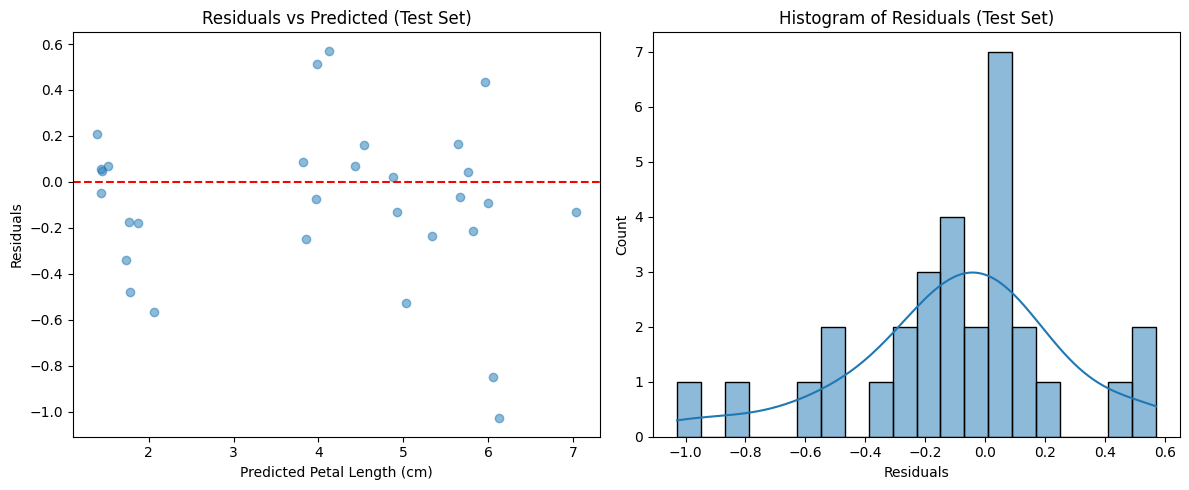

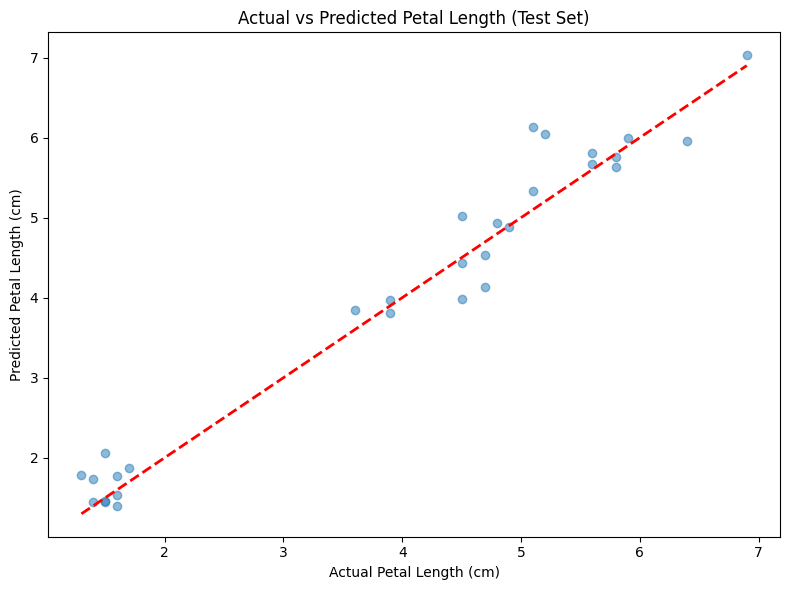

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# 1. Load the Iris dataset from local file
data = pd.read_csv('/Users/shriyog/Documents/SEM6/DMPM/LAB ESE/dataset/Iris.csv')

# Handle column names (assuming UCI Iris dataset structure)
# Common column names in UCI Iris: Idunofficial: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species
# Map to simpler names if necessary
column_mapping = {
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width'
}

# Rename columns if they exist in the dataset
data = data.rename(columns=column_mapping)

# Drop unnecessary columns (e.g., Id, Species) if present
columns_to_keep = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data = data[[col for col in columns_to_keep if col in data.columns]]

# 2. Describe the data
print("Dataset Description:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values (if any, though unlikely for Iris dataset)
data = data.dropna()

# 3. Prepare data for linear regression
# Features: sepal_length, sepal_width, petal_width
# Target: petal_length
X = data[['sepal_length', 'sepal_width', 'petal_width']]
y = data['petal_length']

# Split data into training and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale numerical features
numerical_features = X.columns.tolist()
preprocessor = StandardScaler()

# Create pipeline with preprocessor and linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 4. Build and train the linear regression model
model.fit(X_train, y_train)

# 5. Analyze predicted values
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("\nFirst 10 Predicted vs Actual Petal Lengths (Test Set):")
for i in range(10):
    print(f"Predicted: {y_pred_test[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")

# 6. Compute and plot residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(12, 5))

# Residuals vs Predicted (Test Set)
plt.subplot(1, 2, 1)
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Petal Length (cm)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Test Set)')

# Residuals Histogram (Test Set)
plt.subplot(1, 2, 2)
sns.histplot(residuals_test, kde=True, bins=20)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals (Test Set)')
plt.tight_layout()
plt.savefig('residuals_plot.png')

# 7. Determine model performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("\nModel Performance Metrics:")
print(f"Training MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Training R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

# Additional Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Petal Length (cm)')
plt.ylabel('Predicted Petal Length (cm)')
plt.title('Actual vs Predicted Petal Length (Test Set)')
plt.tight_layout()
plt.savefig('actual_vs_predicted_plot.png')

# Feature Coefficients
feature_names = X.columns.tolist()
coefficients = model.named_steps['regressor'].coef_
print("\nFeature Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")